In [1]:
import random

import pandas as pd

from caveat import report
from caveat.features import participation, sequence, times

In [2]:
raw = pd.read_csv("data/synthetic_population.csv")

def down_sample(df, p):
    n_samples = int(len(df.pid.unique()) * p)
    sample_ids = random.sample(list(df.pid.unique()), n_samples)
    sampled = df[df.pid.isin(sample_ids)]
    return sampled

observed = down_sample(raw, 0.2)

sampled = {
    "sampled_a": down_sample(observed, 0.2),
    "sampled_b": down_sample(raw, 0.5),
}

In [3]:
report.report_diff(observed, sampled, participation.participation_rates)

observed  sampled_a  sampled_a delta  sampled_b  \
participation rate home          2.160      2.125           -0.035      2.170   
                   work          1.000      1.000            0.000      1.004   
                   shop          0.865      0.850           -0.015      0.816   
                   leisure       0.680      0.775            0.095      0.676   
                   education     0.450      0.400           -0.050      0.446   

                              sampled_b delta  
participation rate home                 0.010  
                   work                 0.004  
                   shop                -0.049  
                   leisure             -0.004  
                   education           -0.004

In [4]:
report.report_diff(observed, sampled, times.average_start_times)

observed   sampled_a  sampled_a delta  \
average start time home       555.034722  554.823529        -0.211193   
                   work       420.975000  419.250000        -1.725000   
                   shop       641.531792  650.294118         8.762326   
                   leisure    781.654412  789.677419         8.023008   
                   education  858.333333  883.125000        24.791667   

                               sampled_b  sampled_b delta  
average start time home       559.894009         4.859287  
                   work       419.043825        -1.931175  
                   shop       620.367647       -21.164145  
                   leisure    826.420118        44.765707  
                   education  861.928251         3.594918

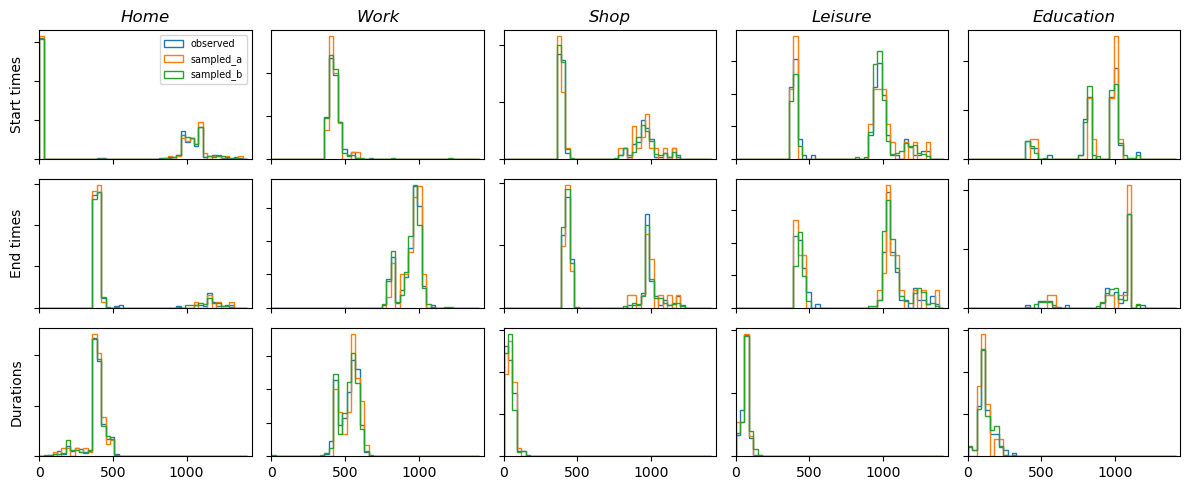

In [5]:
_ = times.times_distributions_plot(observed, sampled, figsize=(12, 5))

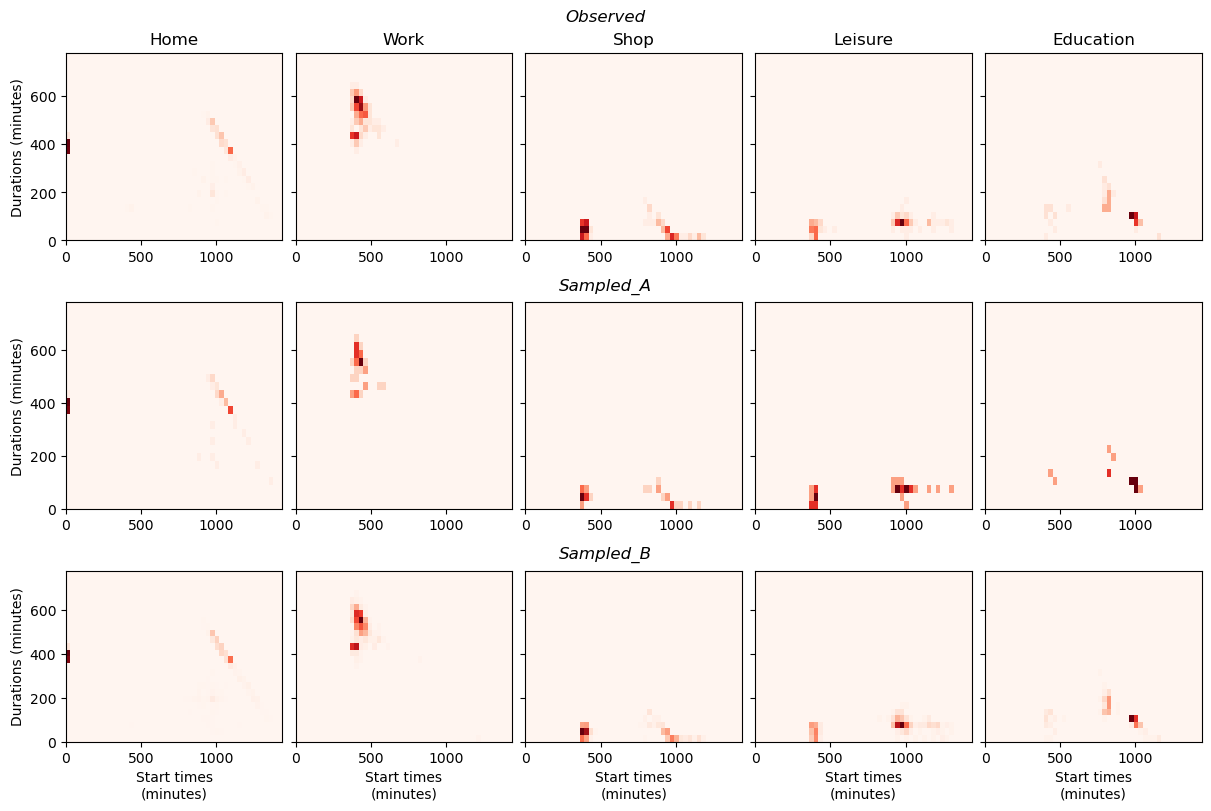

In [6]:
_ = times.joint_time_distributions_plot(observed, sampled, figsize=(12, 8))

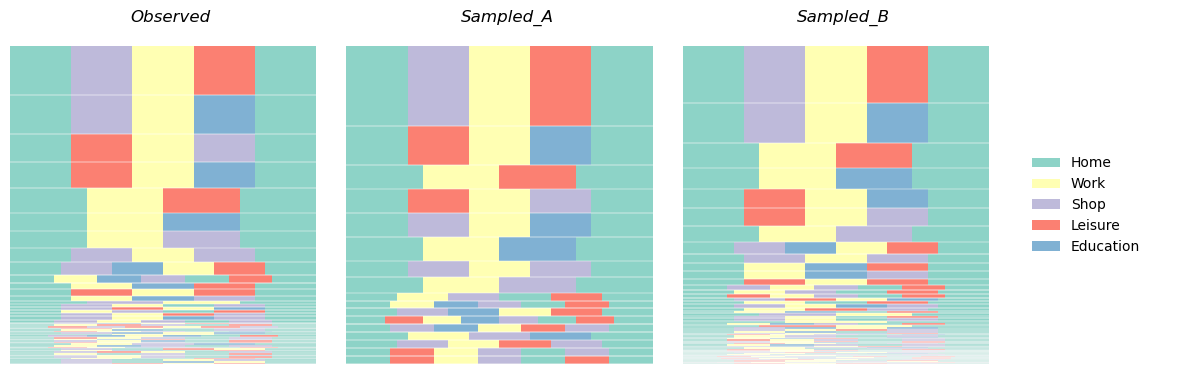

In [7]:
_ = sequence.sequence_prob_plot(observed, sampled, figsize=(12, 4))